# COGS 109: (Data Modeling & Analysis)
# Final Project: Text Classifer: Performance Analysis
***

## Contributors:
   * **Philip Leo Pascual** 
   * **Gustav Santos-Tomas** 
   * **Benjamin Isip**
   
## Introduction:
With natural language processing (NLP) as our motivation, we came to decide on a topic that will be using text-based data for our analysis. As our first NLP project, we decided to go with a text classifier to ease our way into the domain of NLP. This in part lead us to use the well known 20newsgroup dataset, imported from sk-learn itself.

By implementing a text classifier we would hope to get some insight to how features of a body of text contributes to its own "meaning/purpose". This analysis will look into methods that one can use to classify documents within the context of news papers, to identify the entirety of a given text. We would hope that this project brings up the awareness of how aspects of a document affect their ability to be classified.

## Data Set: 20newsgroups
As stated above, we decided to use the well known 20newsgroup dataset to train both our Multinomial NB and SVM models. We chose to include all twenty labels within our analysis, having them already pre-splitted for us into training and testing sets.


***

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report as class_report
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from IPython.display import display

In [3]:
# Source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
# Confusion Matrix Graph
def plot_ConMatrix(prediction):
    conf_arr = metrics.confusion_matrix(twenty_test.target, prediction)
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize = (20,10))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    width, height = conf_arr.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    cb = fig.colorbar(res)
    alphabet = labels
    plt.xticks(range(width), alphabet[:width],rotation=90)
    plt.yticks(range(height), alphabet[:height])
    plt.show()

# Preprocessing Step

In [25]:
# Note: Remove the headers and footers etc. to prevent overfitting
############################ Load in Dataset ############################
twenty_train = fetch_20newsgroups(subset = 'train', shuffle = True, 
                                  remove=('headers', 'footers', 'quotes'),
                                  random_state=42)
twenty_test = fetch_20newsgroups(subset = 'test', shuffle = True,
                                 remove=('headers', 'footers', 'quotes'),
                                 random_state=42)

# Size of the sets
print("Size of the training set: {}".format(len(twenty_train.data)))
print("Size of the testing set: {}".format(len(twenty_test.data)))
print("\n")

############################ Number of Categories ############################
# Prints the categories within our dataset
print("############################ Number of Categories ############################")
print("Number of categories: {}".format(len(twenty_train.target_names)))
print(twenty_train.target_names)
print("\n")

# ################################ Preprocessing ################################
# Filtering out punctuation
def filter_punc(dataset):
    for i, document in enumerate(dataset.data):
        dataset.data[i] = re.sub(r"[^\w\s]", "", document)

filter_punc(twenty_train)
filter_punc(twenty_test)

# POS Tagging
tag_train = []
tag_test = []

def doc_tagging(dataset, tag_list):
    for document in dataset.data:
        tag_list.append(pos_tag(word_tokenize(document)))
        
doc_tagging(twenty_train, tag_train)
doc_tagging(twenty_test, tag_test)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatizer_func(tag_list):
    for i, sent in enumerate(tag_list):
        for j, word in enumerate(sent):
            if (word[1][0].startswith("N") | word[1][0].startswith("V")):
                tag_list[i][j] = lemmatizer.lemmatize(word[0], pos = word[1][0].lower())
            else: 
                tag_list[i][j] = lemmatizer.lemmatize(word[0]) 
            
lemmatizer_func(tag_train)
lemmatizer_func(tag_test)

# Converting back to strings
def conjoin_sent(sent_list):
    for i, sent in enumerate(sent_list):
        sent_list[i] = " ".join(sent)

conjoin_sent(tag_train)
conjoin_sent(tag_test)

Size of the training set: 11314
Size of the testing set: 7532


############################ Number of Categories ############################
Number of categories: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']




# Feature Extraction

In [32]:
############################ Converting to Vectors ############################
# Learning the vocabulary dictionary
# Note: We would want to remove all the stop-words
count_vect = CountVectorizer(stop_words = "english", lowercase = True,  min_df=1, max_df=.5)
fitted_vect = count_vect.fit_transform(tag_train)

print("############################ Converting to Vectors ############################")
print("Number of samples: {} | Number of features: {}".format(fitted_vect.shape[0],
                                                              fitted_vect.shape[1]))
print("\n")

# Perform TF_IDF on the bag-of-words vector
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(fitted_vect)

# Convert the test set into a bag-of-words vector
test_vect = count_vect.transform(tag_test)
test_tfidf = tfidf_transformer.transform(test_vect)

############################ Converting to Vectors ############################
Number of samples: 11314 | Number of features: 101344




# Multinomial Naive Bayes Model

############################ Modeling Naive Bayes ############################


,Documents,Labels,Predicted Labels NB
0,I am a little confused on all of the models of...,7,7
1,Im not familiar at all with the format of thes...,5,1
2,\nIn a word yes\n,0,15
3,\nThey were attacking the Iraqis to drive them...,17,17
4,\nIve just spent two solid months arguing that...,19,0
5,\nElisabeth lets set the record straight for t...,13,13
6,Dishonest money dwindles away but he who gathe...,15,15
7,A friend of mine managed to get a copy of a co...,15,3
8,Hi\n\n We have a requirement for dynamically...,5,5
9,\n well i have lots of experience with scann...,1,1


Accuracy: 0.6991502920870951


-------------------Classification Report-------------------
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.47      0.52       319
           comp.graphics       0.66      0.70      0.68       389
 comp.os.ms-windows.misc       0.72      0.55      0.62       394
comp.sys.ibm.pc.hardware       0.62      0.69      0.66       392
   comp.sys.mac.hardware       0.72      0.70      0.71       385
          comp.windows.x       0.82      0.75      0.78       395
            misc.forsale       0.77      0.71      0.74       390
               rec.autos       0.78      0.74      0.76       396
         rec.motorcycles       0.76      0.74      0.75       398
      rec.sport.baseball       0.93      0.81      0.86       397
        rec.sport.hockey       0.58      0.93      0.71       399
               sci.crypt       0.72      0.76      0.74       396
         sci.electronics       0.72      0.58     

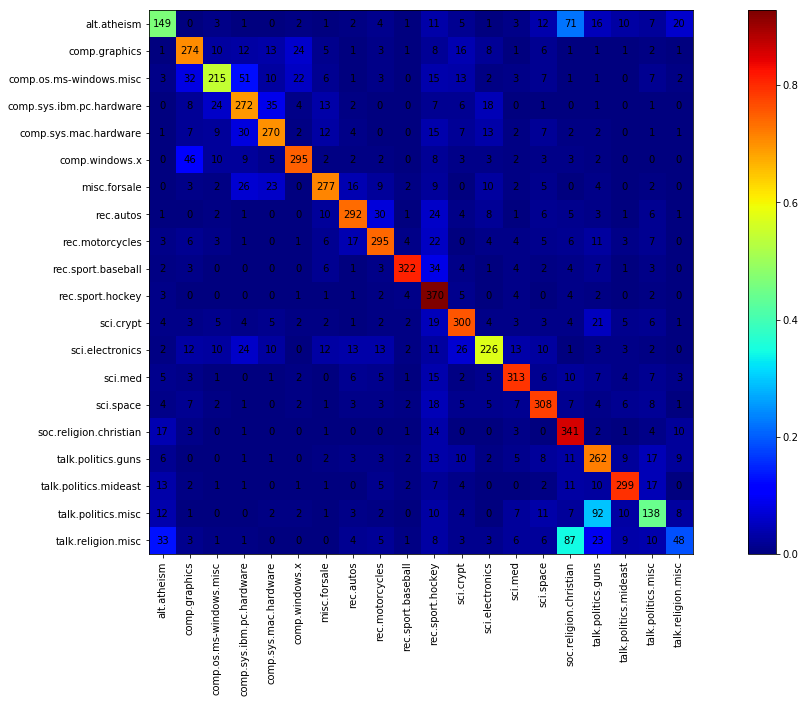

In [33]:
############################ Modeling Naive Bayes ############################
# Model a Multinomal Naive Bayes model
mnb = MultinomialNB(alpha = 0.01).fit(train_tfidf, twenty_train.target)
predicted_NB = mnb.predict(test_tfidf)

print("############################ Modeling Naive Bayes ############################")

# Created a dataframe 
df = pd.DataFrame(data = twenty_test.data, columns = ["Documents"])
df["Labels"] = twenty_test.target
df["Predicted Labels NB"] = predicted_NB
display(df.head(10))

# Accuracy of the Multinomial Naive Bayes
print("Accuracy: {}".format(metrics.accuracy_score(twenty_test.target, predicted_NB)))
print("\n")

print("-------------------Classification Report-------------------")
print(class_report(twenty_test.target,
                   predicted_NB,
                   target_names = twenty_test.target_names))

# Label names
labels = twenty_test.target_names

# Plotting confusion matrix
plot_ConMatrix(predicted_NB)

# Support Vector Machine Model

############################ Modeling Support Vector Machines ############################


,Documents,Labels,Predicted Labels NB,Predicted Labels SVM
0,I am a little confused on all of the models of...,7,7,4
1,Im not familiar at all with the format of thes...,5,1,1
2,\nIn a word yes\n,0,15,15
3,\nThey were attacking the Iraqis to drive them...,17,17,0
4,\nIve just spent two solid months arguing that...,19,0,0
5,\nElisabeth lets set the record straight for t...,13,13,13
6,Dishonest money dwindles away but he who gathe...,15,15,14
7,A friend of mine managed to get a copy of a co...,15,3,6
8,Hi\n\n We have a requirement for dynamically...,5,5,5
9,\n well i have lots of experience with scann...,1,1,1


Accuracy: 0.6943706850770048


------------------------Classification Report------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.56      0.49      0.52       319
           comp.graphics       0.67      0.68      0.67       389
 comp.os.ms-windows.misc       0.64      0.61      0.63       394
comp.sys.ibm.pc.hardware       0.67      0.61      0.64       392
   comp.sys.mac.hardware       0.70      0.71      0.71       385
          comp.windows.x       0.77      0.72      0.75       395
            misc.forsale       0.73      0.82      0.77       390
               rec.autos       0.81      0.70      0.75       396
         rec.motorcycles       0.81      0.75      0.78       398
      rec.sport.baseball       0.83      0.80      0.81       397
        rec.sport.hockey       0.86      0.91      0.88       399
               sci.crypt       0.82      0.74      0.78       396
         sci.electronics       0.62     

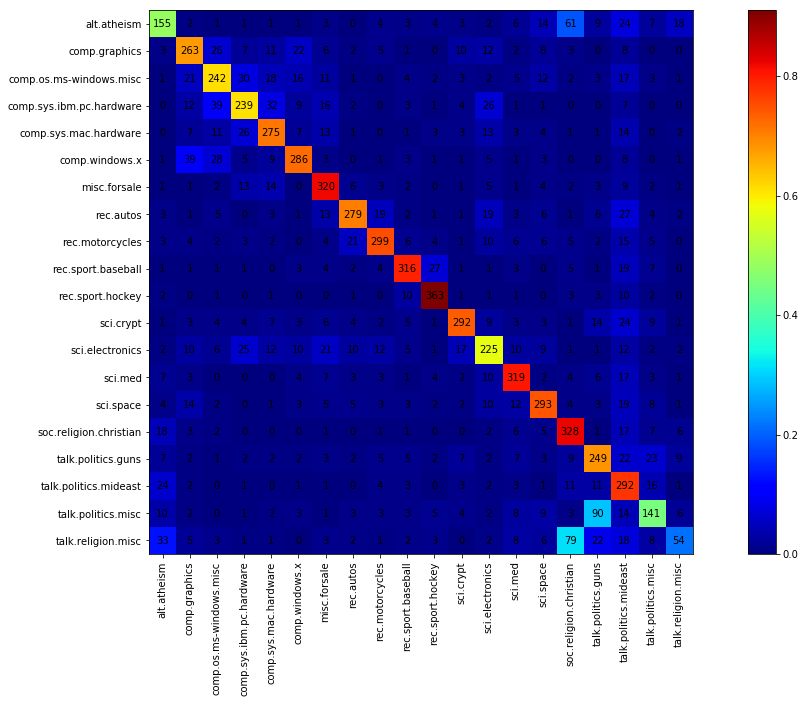

In [31]:
############################ Modeling Support Vector Machines ############################
print("############################ Modeling Support Vector Machines ############################")

# Model SVM
linear_svm = SGD(loss = "hinge")
model_SVM = linear_svm.fit(train_tfidf, twenty_train.target)
predicted_SVM = model_SVM.predict(test_tfidf)
df["Predicted Labels SVM"] = predicted_SVM
display(df.head(10))
print("Accuracy: {}".format(metrics.accuracy_score(twenty_test.target, predicted_SVM)))
print("\n")

print("------------------------Classification Report------------------------")
print(class_report(twenty_test.target,
                   predicted_SVM,
                   target_names = twenty_test.target_names))

# Plotting confusion matrix
plot_ConMatrix(predicted_SVM)

# Results
In training both of our models, we were able to reach an accuracy of approximately 70% on average. This could be the case due to the fact we're considered all twenty labels within our dataset, having overlapping categories that contributed to mislabeling. One can see this more definitively, in the confusion matrices for both models where talk.poltics.misc and talk.religion.misc were often mislabeled for talk.politics.guns and soc.religion.christian respectively.